## Qualitative analysis

This is a notebook for qualitatively analysing nuScenes samples evaluated by the two safety-metrics. To gather the data used in this analysis, the main() function of the DetectionEval class of the modified nuscenes devkit provided should be run with the save_metrics_samples parameters set to a positive amount of samples. 

In [7]:
import numpy as np
import pandas as pd
import os
import json
import math
import random
from nuscenes import NuScenes
from PIL import Image
from visualization_helpers import * 



# Visualize for all detectors to compare
data_root ='/cluster/work/andronn/MasterThesis/MASTER/master_repo/Thesis-Evaluating-Safety-Oriented-Metrics-for-Object-Detectors/results/'
detectors = ['pointpillars-fpn/', 'ssn-REGNET/']
data_loc = [data_root+detector+'QUALITATIVE/'+'METRIC_SAMPLES/' for detector in detectors]
data_loc_m = [data_root+detector+'QUALITATIVE/'+'METRIC_SAMPLES_MODIFIED/' for detector in detectors]


In [2]:
# Get sample tokens of selected samples    
with open(os.path.join(data_root, 'sample_tokens_selected.json'), 'r') as f:
    sample_tokens = json.load(f)['sample_tokens']



ec78e68b1637464da5305a9cbed214c4
28cce0b8fdb7437db096beb047179453
6c8d4379e83646d08436f6ec92b35fe5
f4a78e352cb74deca0bf4e1669aec42a
970e605b05c14027b08a6e74d5e8ceca
c35efe5eaf784275b8c7e31fb50aa902
b8849fcd11d14e499aea2ee258d8b581
d575e4dbdd6749068d4e71f7d99b02bc
645e0c2f9b724c5b95fe434930c2682a
d056b9bdd56f44669540c6c323042d30
c752fd12565d48d598a8bfce5b0530ad
Length:  11
Input sample index to analyze: 1
Sample 28cce0b8fdb7437db096beb047179453:


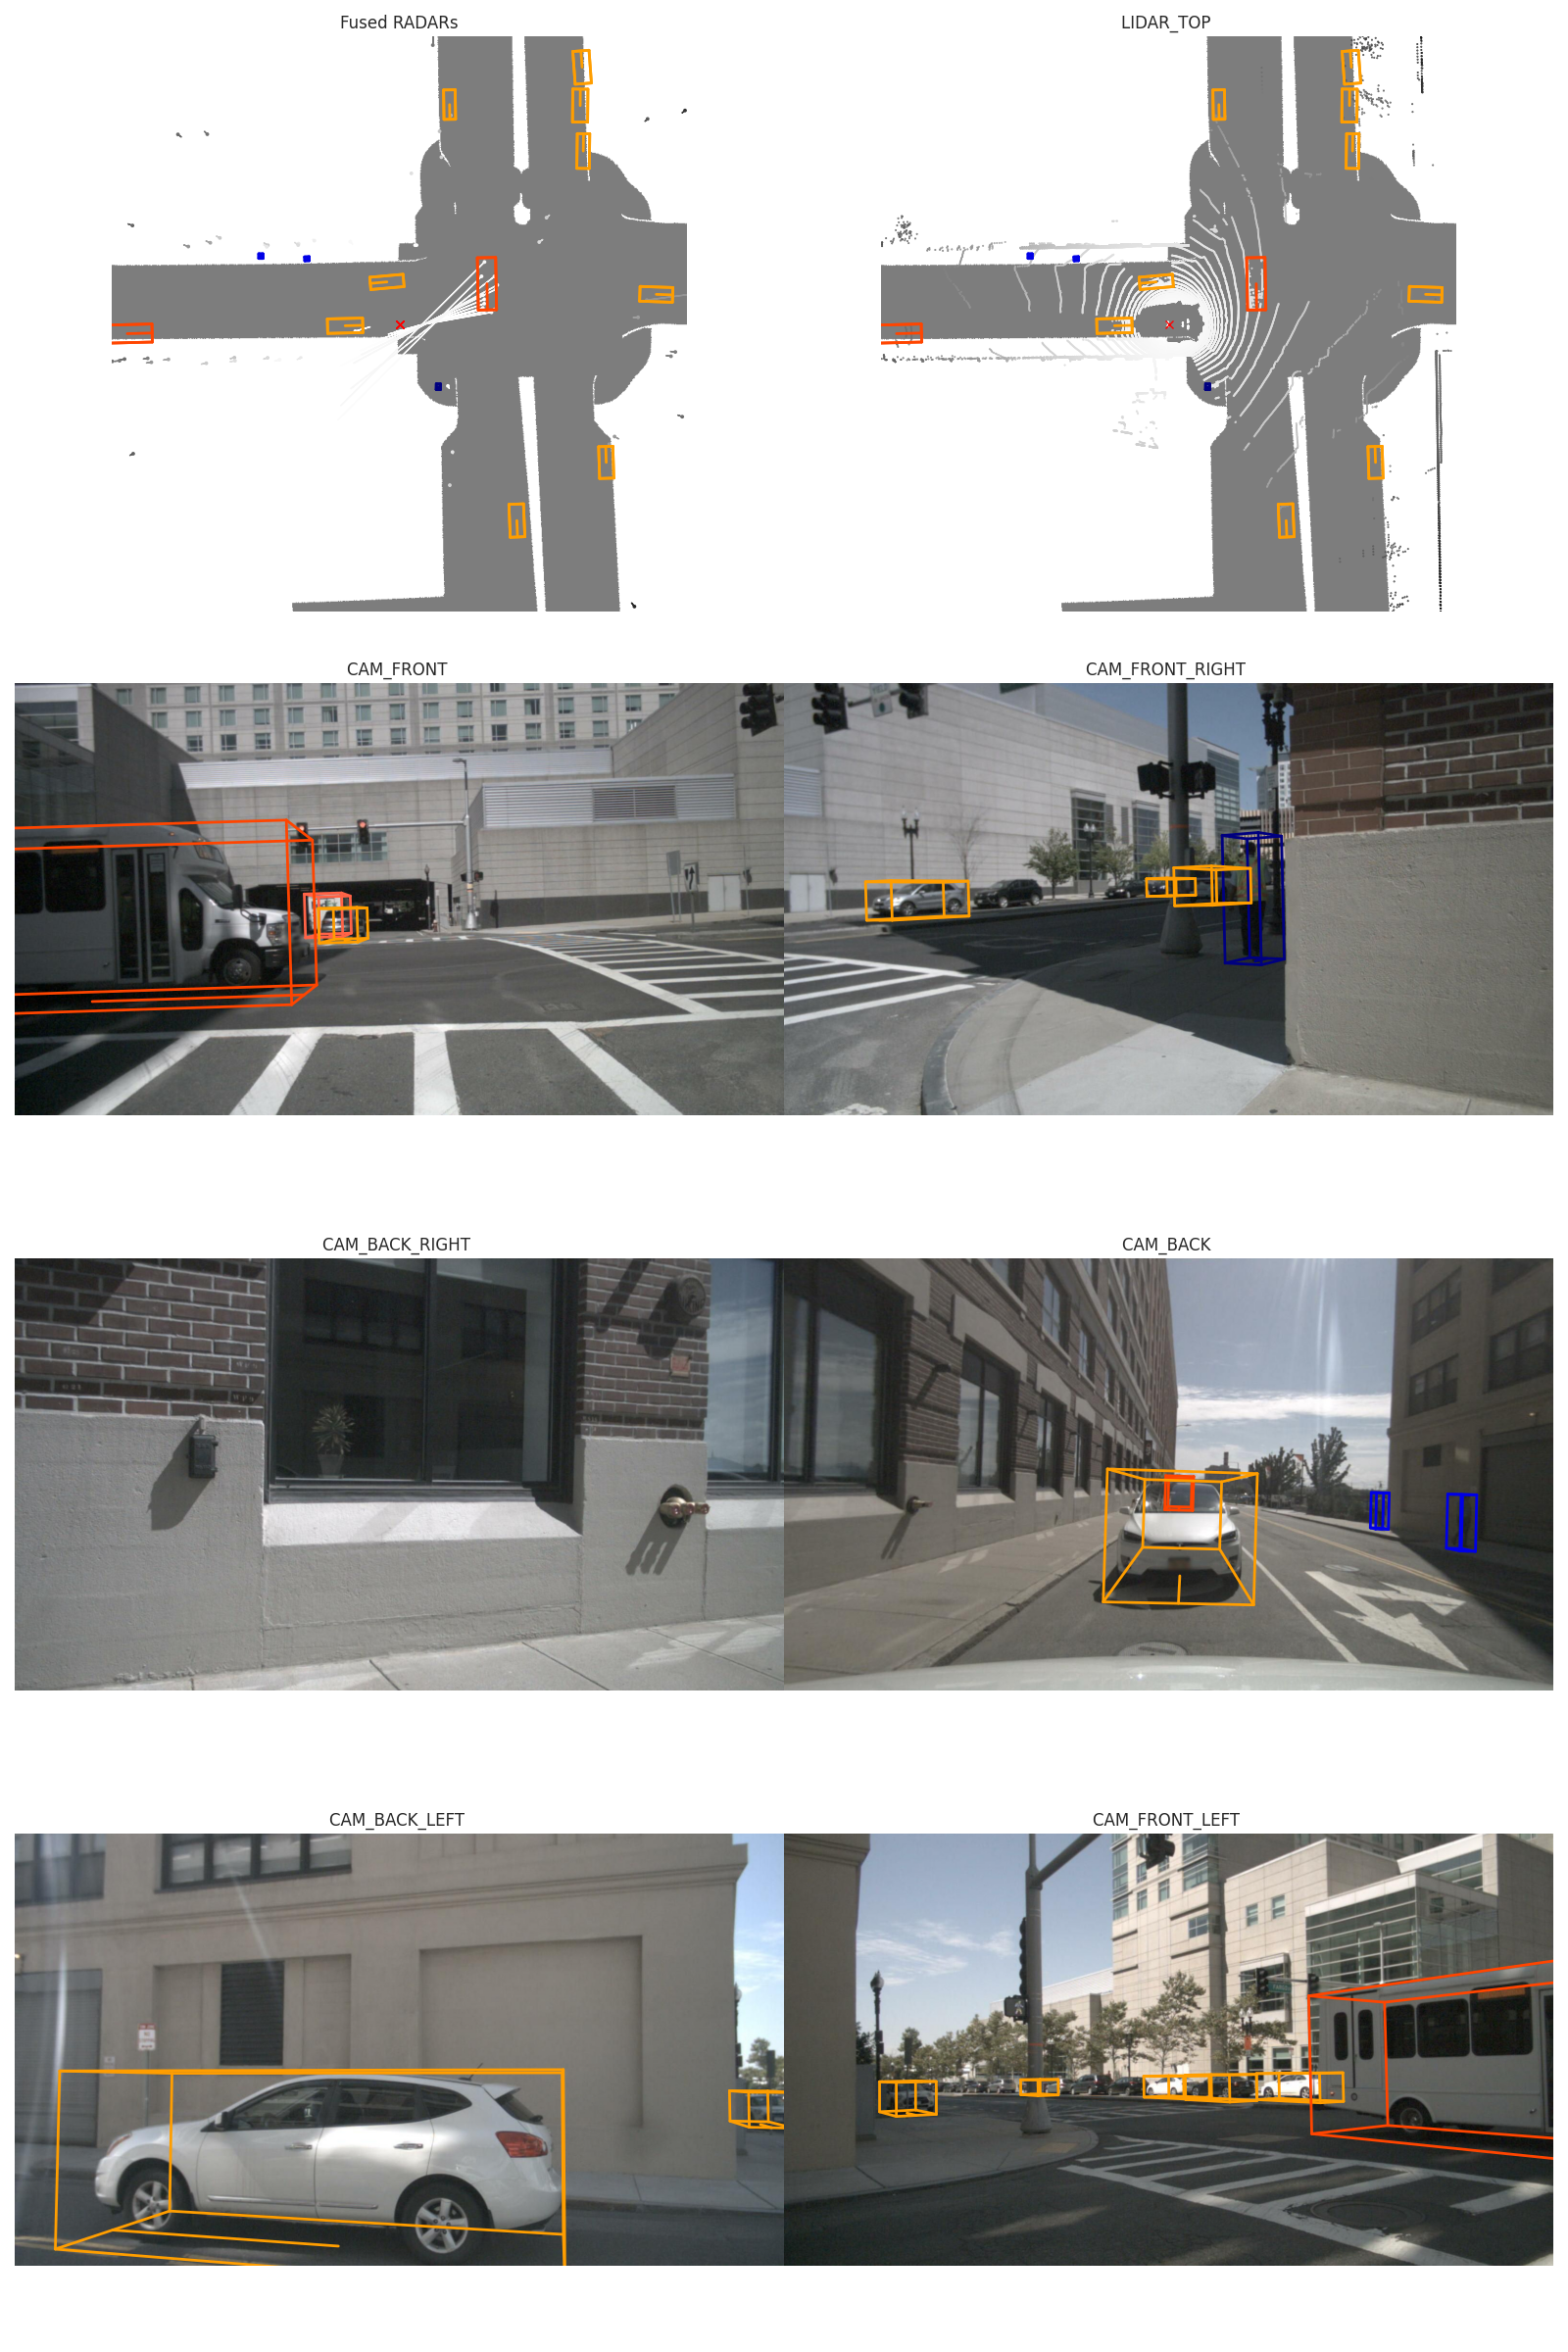

In [13]:
# Choose an index in the sample list to analyse
for t in sample_tokens:
    print(t)
    
print("Length: ", len(sample_tokens))
idx = int(input("Input sample index to analyze: ")) 

from IPython.display import display

print("Sample {}:".format(sample_tokens[idx]))
display(Image.open(data_loc[0]+sample_tokens[idx]+'/SENSOR_ANN_VIZ.png'))

**Below we visualize the sample in question and the birds-eye Ground Truths (green) and Predictions (blue):**

LIDAR predictions:


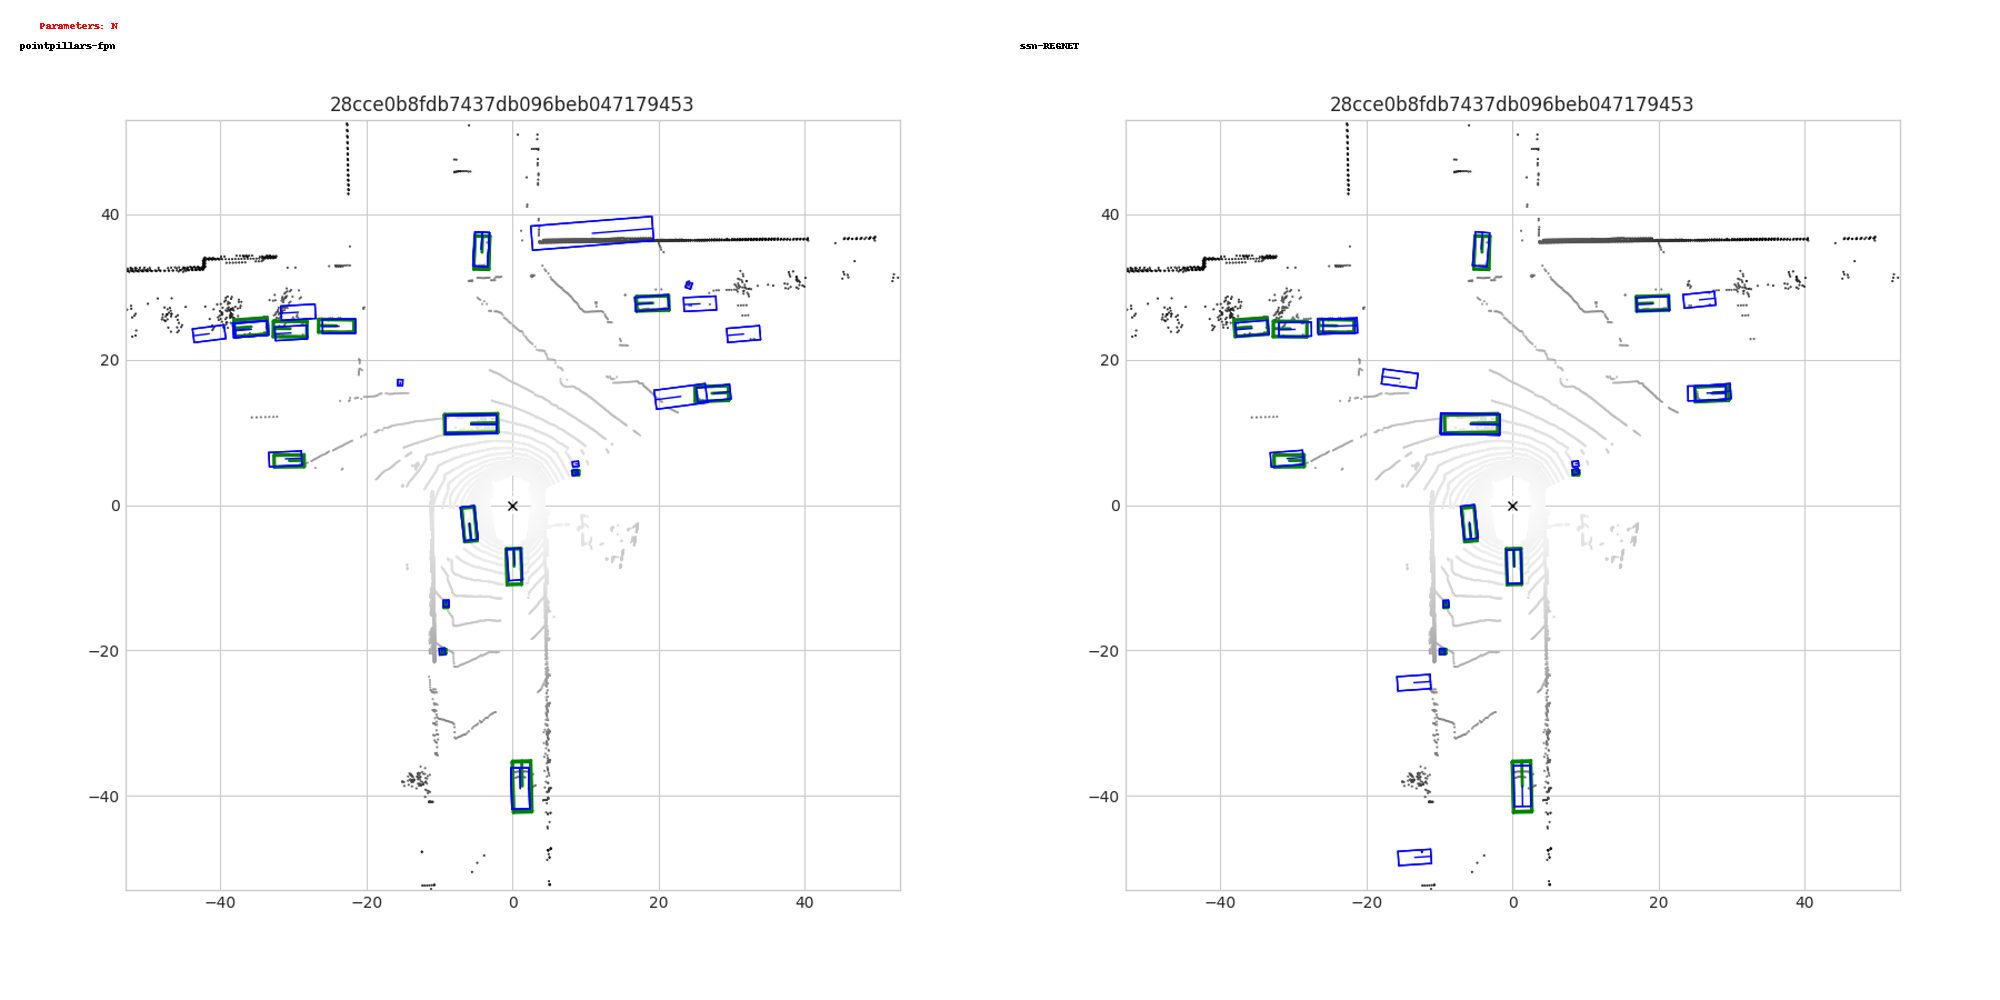

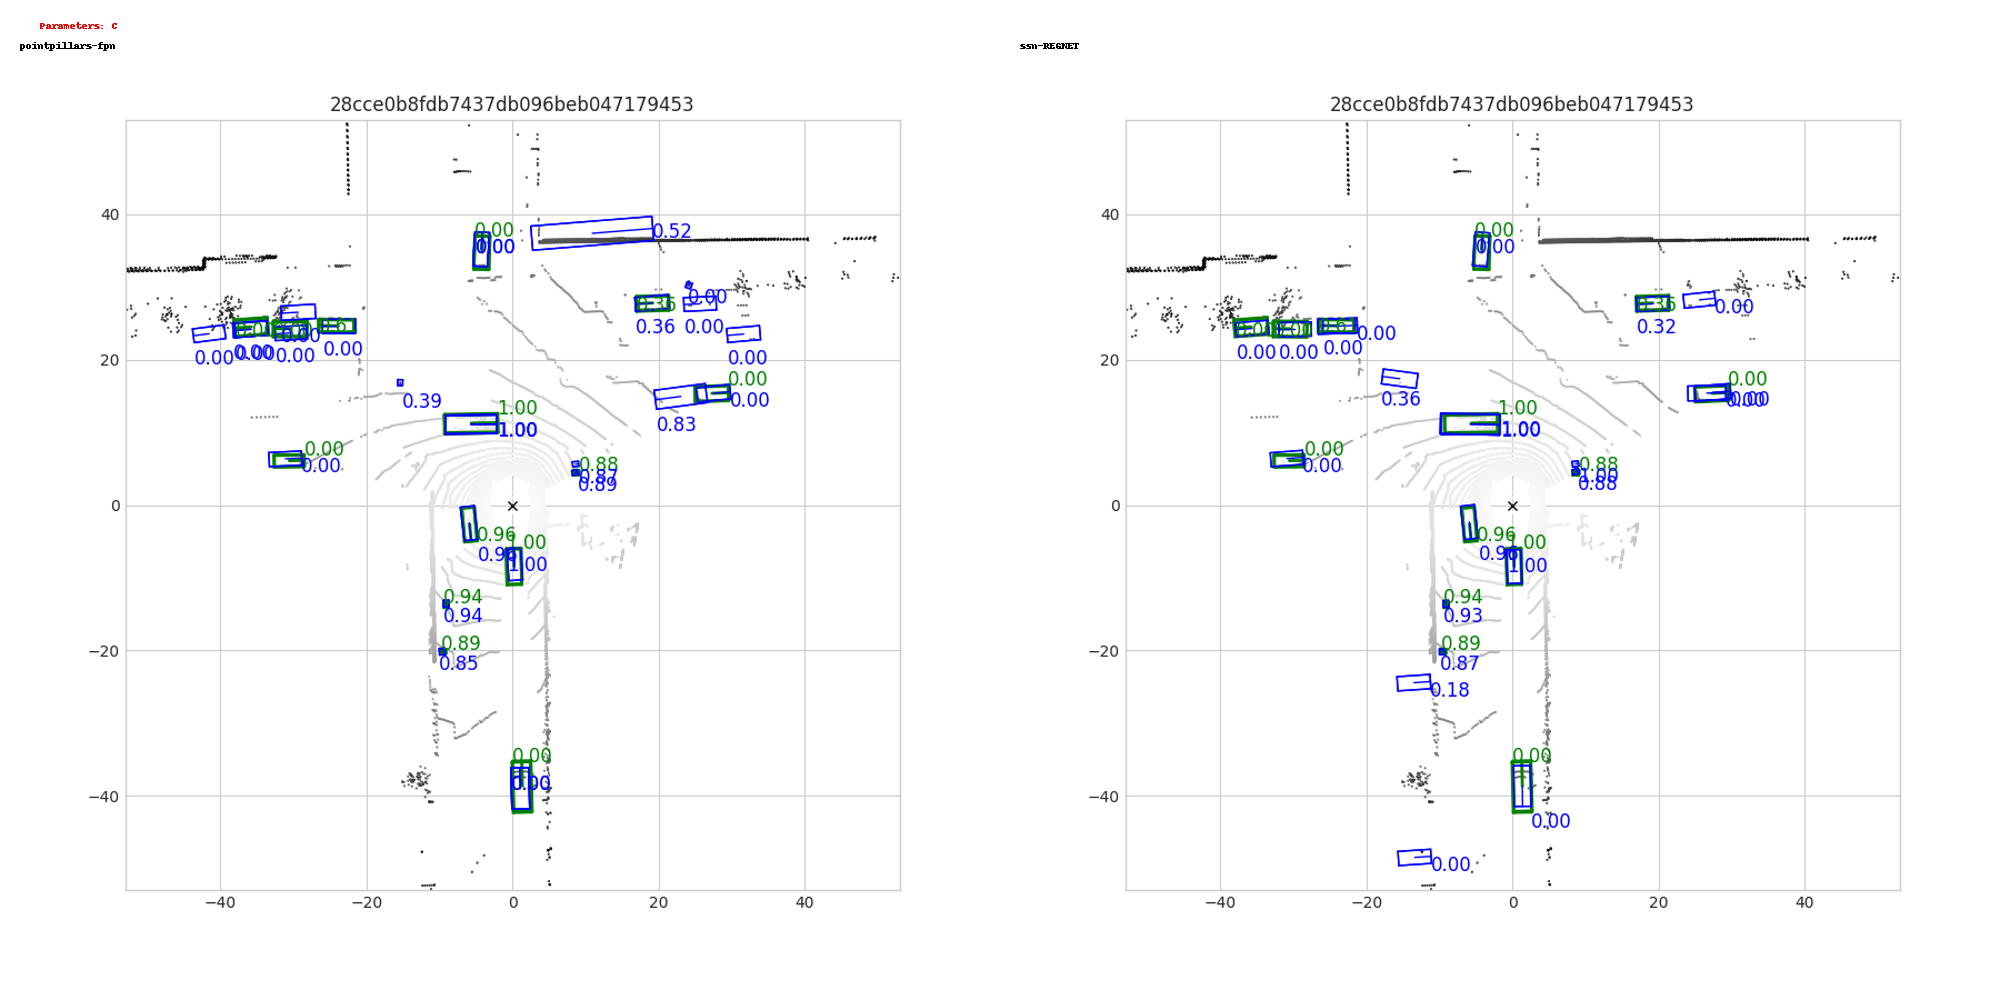

LIDAR predictions (Modified):


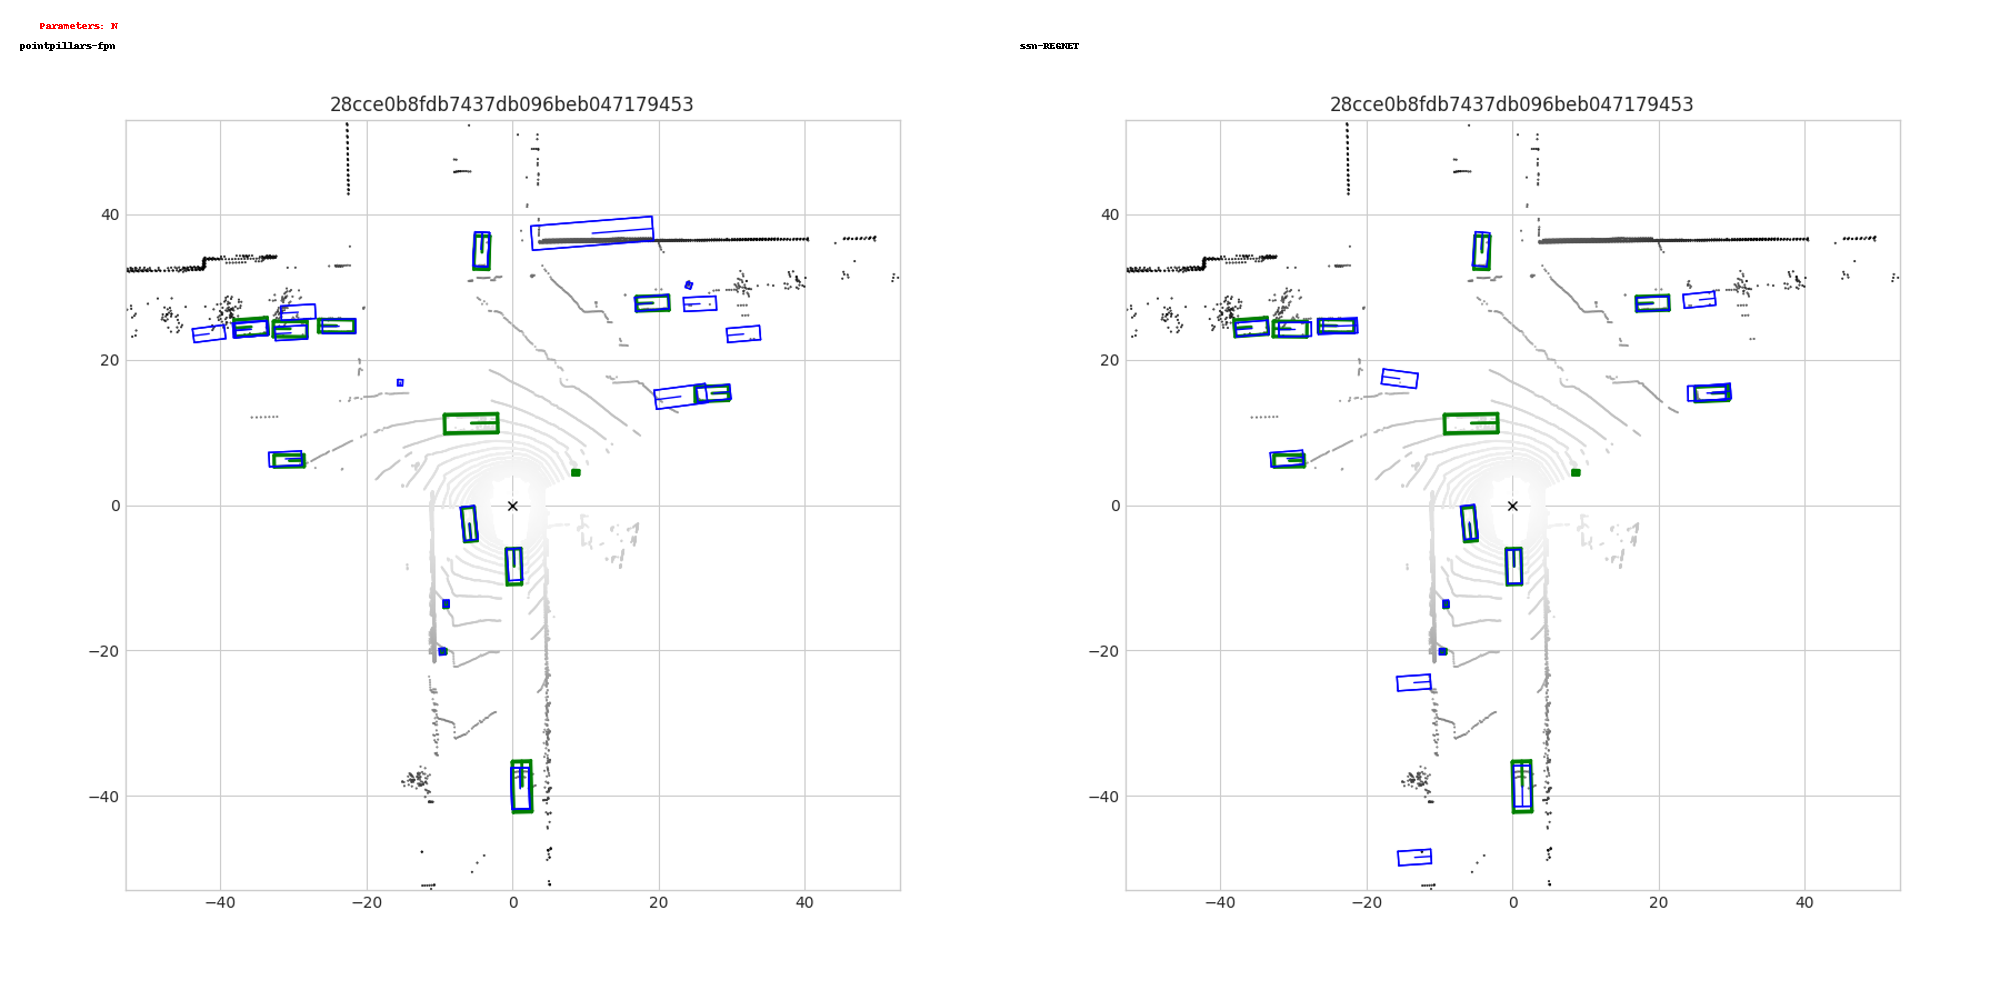

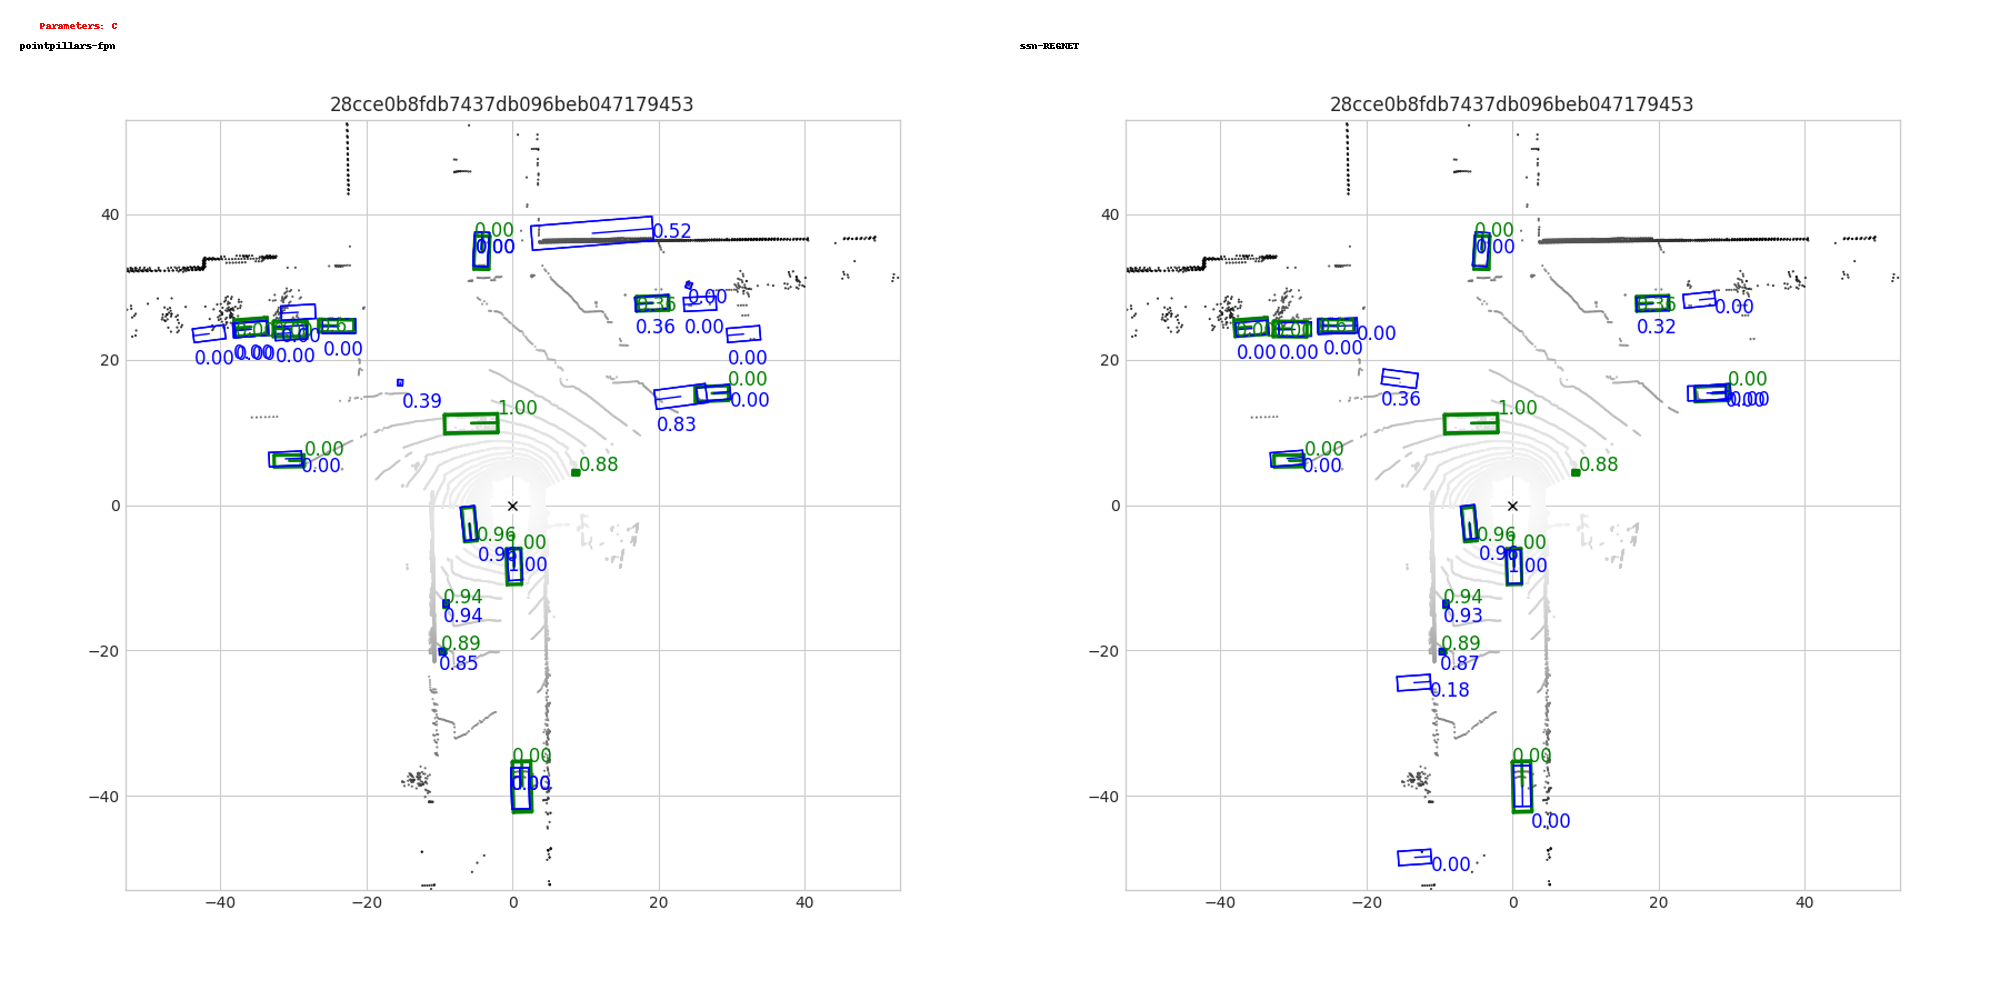

In [14]:

size=(1000,1000)
print("LIDAR predictions:")
display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'N', size))
display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'C', size))

print("LIDAR predictions (Modified):")

display(visualize_crits(data_loc_m, detectors, sample_tokens[idx], 'N', size))
display(visualize_crits(data_loc_m, detectors, sample_tokens[idx], 'C', size))


#display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'C', size=(700,700)))
#display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'D'))
#display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'T'))
#display(visualize_crits(data_loc, detectors, sample_tokens[idx], 'R'))


In [15]:
# Read tables into dataframes
# Headers every 2nd row in csvs:

dfs_pr = [pd.read_csv(path + sample_tokens[idx] + '/threshold_metrics.txt', 
                   delimiter=";", header=0) for path in data_loc]
dfs_pr_m = [pd.read_csv(path + sample_tokens[idx] + '/threshold_metrics.txt', 
                   delimiter=";", header=0) for path in data_loc_m]

keep_car_only = False

for i in range(len(dfs_pr)):
    # Remove duplicate headers
    dfs_pr[i] = dfs_pr[i][dfs_pr[i]['Class'].ne('Class')]
    dfs_pr_m[i] = dfs_pr_m[i][dfs_pr_m[i]['Class'].ne('Class')]
    if keep_car_only:
        dfs_pr[i] = dfs_pr[i][dfs_pr[i]['Class'].eq('car')]
        dfs_pr_m[i] = dfs_pr_m[i][dfs_pr_m[i]['Class'].eq('car')]
for i in range(len(dfs_pr)):
    p_crits = [row['Class']+': '+str(row['Prec_crit']) for index,row in dfs_pr[i].iterrows()]
    r_crits = [row['Class']+': '+str(row['Rec_crit']) for index,row in dfs_pr[i].iterrows()]
    
    print("\n\nDetector: {}".format(detectors[i]))
    with open(os.path.join(data_loc[i], sample_tokens[idx], 'pkl_results.json'), 'r') as f:
        print("PKL: {}\nPrecision_crits: {}\nRecall_crits:  {}".format(json.load(f)['full'][sample_tokens[idx]], 
                                                                       str(p_crits), 
                                                                       str(r_crits))) # print sample high-level metrics
    
for i in range(len(dfs_pr)):
    p_crits_m = [row['Class']+': '+str(row['Prec_crit']) for index,row in dfs_pr_m[i].iterrows()]
    r_crits_m = [row['Class']+': '+str(row['Rec_crit']) for index,row in dfs_pr_m[i].iterrows()] 
    
    print("\nDetector: {} - MODIFIED".format(detectors[i]))
    with open(os.path.join(data_loc_m[i], sample_tokens[idx], 'pkl_results.json'), 'r') as f:
        print("PKL: {}\nPrecision_crits: {}\nRecall_crits:  {}".format(json.load(f)['full'][sample_tokens[idx]], 
                                                                                  str(p_crits_m), 
                                                                                  str(r_crits_m))) # print sample high-level metrics
    
    


#visualize_table([d+sample_tokens[idx]+'/PR_summary.txt' for d in data_loc])
#visualize_table([d+sample_tokens[idx]+'/AP_summary.txt' for d in data_loc])



Detector: pointpillars-fpn/
PKL: 0.104842409491539
Precision_crits: ['car: 0.884041067916129', 'bus: 0.9998970580567733', 'pedestrian: 0.6897190093167845']
Recall_crits:  ['car: 0.7900209535887026', 'bus: 1.0', 'pedestrian: 0.987143131678157']


Detector: ssn-REGNET/
PKL: 0.11322550475597382
Precision_crits: ['car: 1.0', 'bus: 1.0', 'pedestrian: 0.7353529261188307']
Recall_crits:  ['car: 0.7765525607763133', 'bus: 0.9998052438475756', 'pedestrian: 0.9910804720897808']

Detector: pointpillars-fpn/ - MODIFIED
PKL: 3.52443790435791
Precision_crits: ['car: 1.0', 'pedestrian: 0.8395410352045045']
Recall_crits:  ['car: 0.7900209535887026', 'pedestrian: 0.6605969899700506']

Detector: ssn-REGNET/ - MODIFIED
PKL: 3.458585739135742
Precision_crits: ['car: 1.0', 'pedestrian: 1.0']
Recall_crits:  ['car: 0.7765525607763133', 'pedestrian: 0.6657420297523006']


In [16]:
print("Detailed metric data")
for i in range(len(dfs_pr)):
    print("Detector: {}".format(detectors[i]))
    display(dfs_pr[i])
    print("Detector: {} - MODIFIED".format(detectors[i]))
    display(dfs_pr_m[i])

Detailed metric data
Detector: pointpillars-fpn/


Model       Class dist_th conf_th  TPs  FPs  FNs  \
0  pointpillars-fpn         car     2.0    0.15  9.0  6.0  0.0   
2  pointpillars-fpn         bus     2.0    0.15  1.0  0.0  1.0   
4  pointpillars-fpn  pedestrian     2.0    0.15  3.0  3.0  0.0   

        TPs_pred_crit         TPs_gt_crit       FPs_pred_crit  \
0  2.3151115330579364  2.9304432022232416  0.9997154682836569   
2  0.9997154682836569   0.999612555630678                 0.0   
4   2.676251918571908  2.7111082807436877  1.2544912451249026   

               FNs_gt_crit Prec  Rec           Prec_crit            Rec_crit  
0       0.6153316691653048  0.6  1.0   0.884041067916129  0.7900209535887026  
2  -0.00010291265297890373  1.0  0.5  0.9998970580567733                 1.0  
4     0.034856362171779676  0.5  1.0  0.6897190093167845   0.987143131678157

Detector: pointpillars-fpn/ - MODIFIED


Model       Class dist_th conf_th  TPs  FPs  FNs  \
0  pointpillars-fpn         car     2.0    0.15  9.0  5.0  0.0   
2  pointpillars-fpn  pedestrian     2.0    0.15  2.0  2.0  1.0   

        TPs_pred_crit         TPs_gt_crit        FPs_pred_crit  \
0  2.3151115330579364  2.9304432022232416                  0.0   
2   1.790949969742159  1.8278950360610602  0.38630517254615293   

          FNs_gt_crit                Prec                 Rec  \
0  0.6153316691653048  0.6428571428571429                 1.0   
2  0.9201583110015288                 0.5  0.6666666666666666   

            Prec_crit            Rec_crit  
0                 1.0  0.7900209535887026  
2  0.8395410352045045  0.6605969899700506

Detector: ssn-REGNET/


Model       Class dist_th conf_th  TPs  FPs  FNs       TPs_pred_crit  \
0  ssn-REGNET         car     2.0    0.15  9.0  5.0  0.0  2.2756431728959976   
2  ssn-REGNET         bus     2.0    0.15  1.0  0.0  1.0  0.9994178749354282   
4  ssn-REGNET  pedestrian     2.0    0.15  3.0  1.0  0.0   2.686926474765968   

          TPs_gt_crit       FPs_pred_crit            FNs_gt_crit  \
0  2.9304432022232416  0.5439239842076846     0.6548000293272436   
2   0.999612555630678                 0.0  0.0001946806952497493   
4  2.7111082807436877  0.9998859175540442   0.024181805977719684   

                 Prec  Rec           Prec_crit            Rec_crit  
0  0.6428571428571429  1.0                 1.0  0.7765525607763133  
2                 1.0  0.5                 1.0  0.9998052438475756  
4                0.75  1.0  0.7353529261188307  0.9910804720897808

Detector: ssn-REGNET/ - MODIFIED


Model       Class dist_th conf_th  TPs  FPs  FNs       TPs_pred_crit  \
0  ssn-REGNET         car     2.0    0.15  9.0  5.0  0.0  2.2756431728959976   
2  ssn-REGNET  pedestrian     2.0    0.15  2.0  0.0  1.0  1.8048987297005725   

          TPs_gt_crit       FPs_pred_crit         FNs_gt_crit  \
0  2.9304432022232416  0.5439239842076846  0.6548000293272436   
2  1.8278950360610602                 0.0  0.9062095510431152   

                 Prec                 Rec Prec_crit            Rec_crit  
0  0.6428571428571429                 1.0       1.0  0.7765525607763133  
2                 1.0  0.6666666666666666       1.0  0.6657420297523006

#### Next cell is run independently, and is for visualizing larger quantities of metric data generated with the random_token_predictions parameter of main

In [36]:
#### data_root ='/cluster/work/andronn/MasterThesis/MASTER/master_repo/Thesis-Evaluating-Safety-Oriented-Metrics-for-Object-Detectors/results/'

import numpy as np
import pandas as pd
import os
import json
import math
import random
from nuscenes import NuScenes
from PIL import Image
from visualization_helpers import * 



# Visualize for all detectors to compare
data_root ='/cluster/work/andronn/MasterThesis/MASTER/master_repo/Thesis-Evaluating-Safety-Oriented-Metrics-for-Object-Detectors/results/'
detector = 'ssn-REGNET/'
#data_loc = [data_root+detector+'METRIC_SAMPLES_RANDOM/' for detector in detectors]
data_loc = data_root+detector+'FILTERED_METRIC_SAMPLES_RANDOM_FPs_40/'
keep_car_only = True

# Get sample tokens of selected samples    
with open(os.path.join(data_root, 'sample_tokens_random.json'), 'r') as f:
    sample_tokens = json.load(f)['sample_tokens']

pkls = []
precs = []
o_recs = []
o_precs = []
recs = []
f1=[]
o_f1=[]
for tok in sample_tokens:
    try:
        with open(os.path.join(data_loc, tok, 'pkl_results.json'), 'r') as f:
            val = json.load(f)['full'][tok]
            
            if math.isinf(val) or val <= 0.0:
                # hack to account for undefined values
                raise FileNotFoundError
    except FileNotFoundError as e:
        #print(str(e), ": deleting token {}".format(tok))
        continue
    
    try:
        dfs_pr = pd.read_csv(data_loc + tok + '/threshold_metrics.txt', 
                           delimiter=";", header=0)
        
    except FileNotFoundError as e:
        #print(str(e), ": deleting token {}".format(tok))
        continue
        

    # Remove duplicate headers
    dfs_pr = dfs_pr.drop_duplicates()
    dfs_pr = dfs_pr[dfs_pr['Class'].ne('Class')]
    dfs_pr = dfs_pr.dropna()
    
    if keep_car_only:
        dfs_pr = dfs_pr[(dfs_pr['Class'].eq('car'))]
        
        
        # Filter to ensure sufficient amount of class for sample to be evaluated
        #
        dfs_pr = dfs_pr[((pd.to_numeric(dfs_pr['TPs']) + 
                                    pd.to_numeric(dfs_pr['FNs'])) <= 4)]
        
        #dfs_pr = dfs_pr[pd.to_numeric(dfs_pr['FNs']) == 0]
        #dfs_pr = dfs_pr[pd.to_numeric(dfs_pr['FPs']) == 0]  
        #dfs_pr = dfs_pr[pd.to_numeric(dfs_pr['FNs_gt_crit']) == 1]

    if len(dfs_pr)==0: continue
        
    # PRECISION AND RECALL
    p = pd.to_numeric(dfs_pr['Prec_crit'])[0]
    r = pd.to_numeric(dfs_pr['Rec_crit'])[0]
    o_p = pd.to_numeric(dfs_pr['Prec'])[0]
    o_r = pd.to_numeric(dfs_pr['Rec'])[0]
    precs.append(p)
    recs.append(r)
    o_precs.append(o_p)
    o_recs.append(o_r)
    if (np.isnan(2*(p*r)/(p+r))): # COMPUTE F1-score
        f1.append(0.0) 
    else:
        f1.append(2*(p*r)/(p+r))
    o_f1.append(2*(o_p*o_r)/(o_p+o_r))
    
    
    with open(os.path.join(data_loc, tok, 'pkl_results.json'), 'r') as f:
        val = json.load(f)['full'][tok]
        pkls.append(val)

        
def rolling_average(lst, num_avg):
    assert all(len(sublist) == len(lst[0]) for sublist in lst), "Sublists must have the same length"
    rolling_avgs = []
    for sublist in lst:
        rolling_sublist = []
        for i in range(0, len(sublist)-1, num_avg):
            rolling_sublist.append(np.mean(sublist[i:i+num_avg]))
        # handle the last element(s) separately
        last_elem_start_idx = len(sublist) - num_avg
        if last_elem_start_idx >= 0:
            last_rolling_avg = np.mean(sublist[last_elem_start_idx:])
            rolling_sublist.append(last_rolling_avg)
        rolling_avgs.append(rolling_sublist)
    return np.array(rolling_avgs)


precs = np.array(precs)
recs = np.array(recs)
pkls = np.array(pkls)
o_recs = np.array(o_recs)
o_precs = np.array(o_precs)
f1 = np.array(f1)
o_f1 = np.array(o_f1)

#pkls = np.array(pkls)
loger = lambda l: -np.log(l) 
lfunc = np.vectorize(loger)
pkls = lfunc(pkls)






/tmp/ipykernel_914572/2535660178.py:83: RuntimeWarning: invalid value encountered in double_scalars
  if (np.isnan(2*(p*r)/(p+r))): # COMPUTE F1-score
/tmp/ipykernel_914572/2535660178.py:83: RuntimeWarning: invalid value encountered in double_scalars
  if (np.isnan(2*(p*r)/(p+r))): # COMPUTE F1-score
/tmp/ipykernel_914572/2535660178.py:83: RuntimeWarning: invalid value encountered in double_scalars
  if (np.isnan(2*(p*r)/(p+r))): # COMPUTE F1-score


Visualizing 250 samples
PearsonRResult(statistic=0.2303255770215548, pvalue=0.00023969870754672452)
SignificanceResult(statistic=0.19757630495953982, pvalue=0.0016935005506710135)
Confidence r: ConfidenceInterval(low=0.1093843166369199, high=0.34454687800992223)


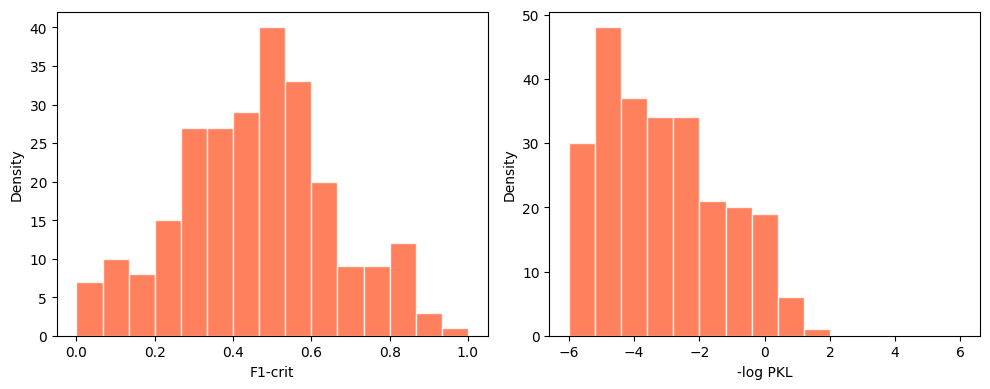

In [37]:

#precs_m, pkls_m, recs_m, maps_m = rolling_average([precs, pkls, recs, maps], 1)


print("Visualizing {} samples".format(len(precs)))
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

def plot(X, y, X_labels, y_label):
    #plt.xlim(np.min(x), np.max(x))
    #plt.ylim(np.min(y), np.max(y))
    fig, ax = plt.subplots(1, len(X),  figsize=(10, 4))
    for idx, x in enumerate(X): 
        if X_labels[idx]!="-log PKL":
            ax[idx].autoscale(False, axis="x")
            ax[idx].set_xticks(np.arange(0, 1.1, 0.1))
            
        ax[idx].set_ylabel(y_label)
        ax[idx].set_xlabel(X_labels[idx])
        ax[idx].grid()
        ax[idx].scatter(x, y, c='#ff6133')
    fig.tight_layout()
    plt.show()
#plot("mAP_crit", "-log PKL", maps, pkls, 1)     
#plt.xticks(np.linspace(0, 1, 10))

r = pearsonr(f1, pkls)
sr = spearmanr(f1, pkls)
o_r = pearsonr(o_f1, pkls)
o_sr = spearmanr(f1, pkls)
print(r)
print(sr)
print("Confidence r: {}".format(r.confidence_interval()))
"""print("# original")
print(o_r)
print(o_sr)"""

#plot((precs,recs, f1), pkls, ("Reliability-Weighted Precision","Safety-Weighted Recall", "F1-score"), "-log PKL") 
#plot((o_precs,o_recs, o_f1), pkls, ("Precision","Recall", "F1-score"), "-log PKL")



# Visualize Data: Histograms

fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Plots #
    # Plot histogram
ax[0].hist(f1, bins = 15, range=(0,1), color='#ff6133', alpha=0.8, edgecolor='#ffffff')
pkls_hist = np.sort(pkls)
ax[1].hist(pkls_hist, bins = 15, range=(-6, 6), color='#ff6133', alpha=0.8, edgecolor='#ffffff')
# X #
ax[0].set_xlabel("F1-crit")
ax[1].set_xlabel("-log PKL")


ax[0].set_ylabel("Density")
ax[1].set_ylabel("Density")
# Overall #

fig.tight_layout()

plt.show()

#plot("Safety-Weighted Recall", "-log PKL", recs, pkls) 

#plot("mAP_crit", "-log PKL", maps, pkls, 1) 

In [57]:
# FNs
detector = 'ssn-REGNET/'
falses = 6

#data_locs = [data_root+detector+'/FN_EX/'+'FN_EX_{}/'.format(i+1) for i in range(falses)]
data_locs = [data_root+detector+'/FP_EX/'+'FP_EX_{}/'.format(i+1) for i in range(falses)]
# Get sample tokens of selected samples    
with open(os.path.join(data_root, 'sample_tokens_random.json'), 'r') as f:
    sample_tokens = json.load(f)['sample_tokens'][:100]
    
p_avg = []
r_avg = []
pr_avg = []
o_r_avg = []
o_pr_avg = []

o_f1_avg = []
f1_avg = []

num_falses = range(falses)
it = 0
for data_loc in data_locs:
    pkls = []
    recs = []
    precs = []
    o_recs = []
    o_precs = []
    f1 = []
    o_f1 = []
    for tok in sample_tokens:
        try:
            with open(os.path.join(data_loc, tok, 'pkl_results.json'), 'r') as f:
                val = json.load(f)['full'][tok]
            
                if math.isinf(val):
                    # hack to account for undefined values
                    raise FileNotFoundError
        except FileNotFoundError as e:
            #print(str(e), ": deleting token {}".format(tok))
            continue

        try:
            dfs_pr = pd.read_csv(data_loc + tok + '/threshold_metrics.txt', 
                               delimiter=";", header=0)

        except FileNotFoundError as e:
            #print(str(e), ": deleting token {}".format(tok))
            continue


        # Remove duplicate headers
        dfs_pr = dfs_pr.drop_duplicates()
        dfs_pr = dfs_pr[dfs_pr['Class'].ne('Class')]
        dfs_pr = dfs_pr.dropna()

        dfs_pr = dfs_pr[(dfs_pr['Class'].eq('car'))]

          
        if len(dfs_pr)==0: continue
        p = pd.to_numeric(dfs_pr['Prec_crit'])[0]
        r = pd.to_numeric(dfs_pr['Rec_crit'])[0]
        o_p = pd.to_numeric(dfs_pr['Prec'])[0]
        o_r = pd.to_numeric(dfs_pr['Rec'])[0]
        
        
            
            
        precs.append(p)
        recs.append(r)
        o_precs.append(o_p)
        o_recs.append(o_r)
        if (np.isnan(2*(p*r)/(p+r))):
            f1.append(0.0)
        else:
            f1.append(2*(p*r)/(p+r))
        o_f1.append(2*(o_p*o_r)/(o_p+o_r))

        with open(os.path.join(data_loc, tok, 'pkl_results.json'), 'r') as f:
            pkl = json.load(f)['full'][tok]
            """if pkl <= 0.0:
                pkl = np.min(pkls)/2 # lowest recorded"""
            pkls.append(pkl)
            
    pkls = -np.array(pkls)
    recs = np.array(recs)
    precs = np.array(precs)
    o_recs = np.array(o_recs)
    o_precs = np.array(o_precs)
    o_f1 = np.array(o_f1)
    f1 = np.array(f1)
    print(len(pkls))
    """loger = lambda l: -np.log(l) 
    lfunc = np.vectorize(loger)
    pkls = lfunc(pkls)"""
    
    p_avg.append(np.average(pkls))
    r_avg.append(np.average(recs))
    pr_avg.append(np.average(precs))
    o_r_avg.append(np.average(o_recs))
    o_pr_avg.append(np.average(o_precs))
    o_f1_avg.append(np.average(o_f1))
    f1_avg.append(np.average(f1))
    it+=1
    
print(f1_avg, o_f1_avg, p_avg)


98
98
98
98
98
98
[0.7836360436992115, 0.7038213641746911, 0.6496265603193242, 0.6029866251889849, 0.5715843817034345, 0.5404402087487823] [0.7560980290716854, 0.6995883259366499, 0.6576050401483163, 0.6235332574059885, 0.5946170942561928, 0.5694063549236377] [-2.6714080503324467, -23.730330628095842, -45.25864754054619, -62.156377520488235, -71.134676507237, -85.20744982240151]


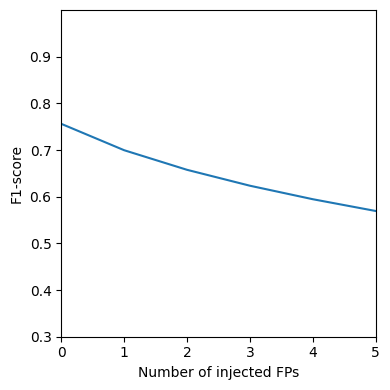

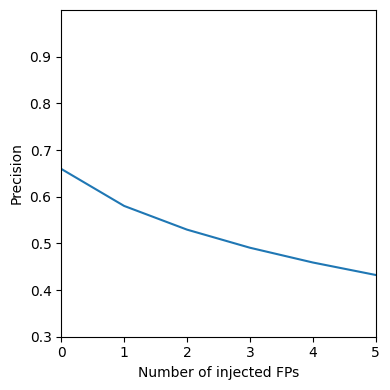

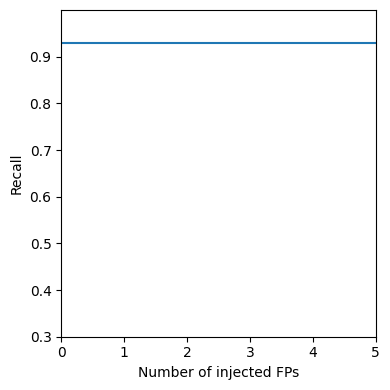

In [60]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_falses(x, Y, x_label, Y_labels):
    #plt.xlim(np.min(x), np.max(x))
    #plt.ylim(np.min(y), np.max(y))
    fig, ax = plt.subplots(1, len(Y),  figsize=(10, 4))
    for idx, y in enumerate(Y): 
        if Y_labels[idx]!="PKL":
            ax[idx].autoscale(False)
            ax[idx].set_yticks(np.arange(0.3,1, 0.1))
            ax[idx].set_ylim(0.3, 1.0)
        else:
            ax[idx].autoscale(False)
            ax[idx].set_ylim(-85,0)


        ax[idx].set_xticks(x)
        ax[idx].set_xlabel(x_label)
        ax[idx].set_ylabel(Y_labels[idx])
        ax[idx].plot(x, y, c='C0')
    fig.tight_layout()
    plt.show()
    
def plot_falses_single(x, y, y_label, method):
    #plt.xlim(np.min(x), np.max(x))
    #plt.ylim(np.min(y), np.max(y))
    fig, ax = plt.subplots(1, 1,  figsize=(4, 4))
    if y_label!="PKL":
        ax.autoscale(False)
        ax.set_yticks(np.arange(0.3,1, 0.1))
        ax.set_ylim(0.3, 1.0)
    else:
        #ax.autoscale(False)
        #ax.set_yticks(np.linspace(-4, 1, 6))
        #ax.set_ylim(-4, 1)
        ax.autoscale(False)
        ax.set_ylim(-85,0)


    ax.set_xticks(x)
    ax.set_xlabel("Number of injected {}".format(method))
    ax.set_ylabel(y_label)
    ax.plot(x, y, c='C0')
    
    fig.tight_layout()
    plt.show()
    
def plot_falses_twin(xticks, m1, m2, m1_label, m2_label, method):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_xticks(xticks)
    ax.set_xlim(0, len(xticks)-1)
    ax.set_yticks(np.linspace(0.3, 1.0, 8))
    ax.set_ylim(0.3, 1)
    ax.set_xlabel("Number of {} injected".format(method))
    ax.set_ylabel(m1_label)
    ax.plot(xticks, m1, 'o-', label=m1_label, color='C1')
    
    ax2 = ax.twinx()
    #ax2.set_ylim(*m2_lim)
    ax2.set_yticks(np.linspace(-90, 0, 10))
    ax2.set_ylim(-90, 0)
    
    ax2.set_ylabel(m2_label)
    ax2.plot(xticks, m2, 'o-', label=m2_label, color='C2')

    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax.legend(h1+h2, l1+l2, loc='upper right')
    ax.grid()
    plt.show()
    

    

plot_falses_single(num_falses, o_f1_avg, "F1-score", "FPs")
plot_falses_single(num_falses, o_pr_avg, "Precision", "FPs")
plot_falses_single(num_falses, o_r_avg, "Recall", "FPs")

#plot_falses_single(num_falses, f1_avg, "F1-crit", "FPs")
#plot_falses_single(num_falses, pr_avg, "Reliability-weighted precision", "FPs")
#plot_falses_single(num_falses, r_avg, "Safety-weighted recall", "FPs")
#plot_falses_single(num_falses, p_avg, "PKL", "FPs")

#plot_falses(num_falses, (f1_avg, p_avg), "Number of FPs", ("F1-crit", "PKL"))
#plot_falses(num_falses, (pr_avg, p_avg), "Number of FPs", ("Reliability-weighted precision", "PKL"))
#plot_falses(num_falses, (r_avg, p_avg), "Number of FPs", ("Safety-weighted recall", "PKL"))
#
#
## Traditional metrics
#plot_falses(num_falses, (o_f1_avg, p_avg), "Number of FPs", ("F1-score", "PKL"))
#plot_falses(num_falses, (o_pr_avg, p_avg), "Number of FPs", ("Precision", "PKL"))
#plot_falses(num_falses, (o_r_avg, p_avg), "Number of FPs", ("Recall", "PKL"))
#plot_falses(num_falses, (o_f1_avg, f1_avg), "Number of FPs", ("F1-score", "F1-crit"))

                                                                  
                                                                  

In [55]:
print("F1-crit: ", f1_avg)
print("Pr-crit: ", pr_avg)
print("R-crit: ", r_avg)
print("PKL: ", p_avg)


print("R-diff: {}".format(r_avg[0]-r_avg[-1]))
print("P-diff: {}".format(pr_avg[0]-pr_avg[-1]))
print("F1-diff: {}".format(f1_avg[0]-f1_avg[-1]))
print("PKL-diff: {}".format(p_avg[0]-p_avg[-1]))

data_locs_fns = [data_root+detector+'/FN_EX/'+'FN_EX_{}/'.format(i+1) for i in range(falses)]
data_loc_raw = data_root+detector+'/METRIC_SAMPLES_RANDOM/'
avg_fns_inserted = []


# Get sample tokens of selected samples    
with open(os.path.join(data_root, 'sample_tokens_random.json'), 'r') as f:
    sample_tokens = json.load(f)['sample_tokens'][:100]

for data_loc in data_locs_fns:
    fns_inserted = []
    for tok in sample_tokens:
        try:
            with open(os.path.join(data_loc, tok, 'pkl_results.json'), 'r') as f:
                val = json.load(f)['full'][tok]
                if math.isinf(val):
                    # hack to account for undefined values
                    raise FileNotFoundError
        except FileNotFoundError as e:
            #print(str(e), ": deleting token {}".format(tok))
            continue
        try:
            dfs_pr = pd.read_csv(data_loc + tok + '/threshold_metrics.txt', 
                               delimiter=";", header=0)
        except FileNotFoundError as e:
            #print(str(e), ": deleting token {}".format(tok))
            continue
        try:
            dfs_pr_raw = pd.read_csv(data_loc_raw + tok + '/threshold_metrics.txt', 
                               delimiter=";", header=0)
        except FileNotFoundError as e:
            #print(str(e), ": deleting token {}".format(tok))
            continue
            
        # Remove duplicate headers
        dfs_pr = dfs_pr.drop_duplicates()
        dfs_pr = dfs_pr[dfs_pr['Class'].ne('Class')]
        dfs_pr = dfs_pr.dropna()
        dfs_pr = dfs_pr[(dfs_pr['Class'].eq('car'))]
        if len(dfs_pr)==0: continue
            
        fns_inserted.append(dfs_pr['FNs'][0]-dfs_pr_raw['FNs'][0])
    
    fns_inserted = np.array(fns_inserted)
    avg_fns_inserted.append(np.mean(fns_inserted))
            
print(avg_fns_inserted)

F1-crit:  [0.8651679970641409, 0.7632875219692029, 0.6609078262933131, 0.5707661990204517, 0.4862114762599877, 0.4178575272494015]
Pr-crit:  [0.9359817361807741, 0.9342183020008046, 0.9123894655553109, 0.8942308409826271, 0.8594663096428038, 0.836848899233946]
R-crit:  [0.8395590382412425, 0.6712128000211451, 0.5489114134830759, 0.4486162760339502, 0.36689446440169804, 0.3065773613760033]
PKL:  [-1.8796163246035575, -24.60808013397746, -36.2712005649507, -43.25635525830825, -59.08453784165765, -62.381343054915625]
R-diff: 0.5329816768652391
P-diff: 0.09913283694682806
F1-diff: 0.44731046981473943
PKL-diff: 60.501726730312065
[0.0, 0.9512195121951219, 1.9066666666666667, 2.859154929577465, 3.746268656716418, 4.548387096774194]


## Plotting differences
Below is an experiment to visualize the changes in PKL and OCM respectively resulting from introducing FPs or FNs to the samples

In [28]:
import numpy as np
import pandas as pd
import os
import json
import math
import random
from nuscenes import NuScenes
from PIL import Image
from visualization_helpers import * 



# Visualize for all detectors to compare
data_root ='/cluster/work/andronn/MasterThesis/MASTER/master_repo/Thesis-Evaluating-Safety-Oriented-Metrics-for-Object-Detectors/results/'
detector = 'ssn-REGNET/'
#data_loc = [data_root+detector+'METRIC_SAMPLES_RANDOM/' for detector in detectors]
data_loc = [data_root+detector+'FILTERED_METRIC_SAMPLES_RANDOM_RAW_40/', 
            data_root+detector+'FILTERED_METRIC_SAMPLES_RANDOM_FPs_40/']


keep_car_only = True

# Get sample tokens of selected samples    
with open(os.path.join(data_root, 'sample_tokens_random.json'), 'r') as f:
    sample_tokens = json.load(f)['sample_tokens']


pkls = [[], []]
precs = [[], []]
recs = [[], []]
dfs_pr = []
sample_tokens_m = []

for tok in sample_tokens:
    imcomparable = False
    for i in range(0,2):
        try:
            with open(os.path.join(data_loc[i], tok, 'pkl_results.json'), 'r') as f:
                val = json.load(f)['full'][tok]

                if math.isinf(val) or val <= 0.0:
                    raise FileNotFoundError
        except FileNotFoundError as e:
            #print(str(e), ": deleting token {}".format(tok))
            imcomparable = True

        try:
            dfs_pr = pd.read_csv(data_loc[i] + tok + '/threshold_metrics.txt', 
                               delimiter=";", header=0)

        except FileNotFoundError as e:
            #print(str(e), ": deleting token {}".format(tok))
            imcomparable = True
        

        # Remove duplicate headers
        dfs_pr = dfs_pr.drop_duplicates()
        dfs_pr = dfs_pr[dfs_pr['Class'].ne('Class')]
        dfs_pr = dfs_pr.dropna()

        if keep_car_only:
            dfs_pr = dfs_pr[(dfs_pr['Class'].eq('car'))]



            # Filter to ensure sufficient amount of class for sample to be evaluated
            dfs_pr = dfs_pr[(pd.to_numeric(pd.to_numeric(dfs_pr['TPs']) + 
                                           pd.to_numeric(dfs_pr['FNs'])) <= 10)]
            #dfs_pr = dfs_pr[((pd.to_numeric(dfs_pr['TPs']) + 
            #                          pd.to_numeric(dfs_pr['FNs'])) <= 8)]
            #dfs_pr = dfs_pr[pd.to_numeric(dfs_pr['FPs']) == 0]
            
        if len(dfs_pr)==0:
            imcomparable = True
    if not imcomparable:
        sample_tokens_m.append(tok)
        

for tok in sample_tokens_m:
    for i in range(0,2):
        try:
            dfs_pr = pd.read_csv(data_loc[i] + tok + '/threshold_metrics.txt', 
                               delimiter=";", header=0)

        except FileNotFoundError as e:
            #print(str(e), ": deleting token {}".format(tok))
            continue
        
        # Remove duplicate headers
        dfs_pr = dfs_pr.drop_duplicates()
        dfs_pr = dfs_pr[dfs_pr['Class'].ne('Class')]
        dfs_pr = dfs_pr.dropna()

        if keep_car_only:
            dfs_pr = dfs_pr[(dfs_pr['Class'].eq('car'))]



            # Filter to ensure sufficient amount of class for sample to be evaluated
            dfs_pr = dfs_pr[(pd.to_numeric(pd.to_numeric(dfs_pr['TPs']) + 
                                           pd.to_numeric(dfs_pr['FNs'])) <= 10)]
            
            #dfs_pr = dfs_pr[pd.to_numeric(dfs_pr['FPs']) == 0]
            #dfs_pr = dfs_pr[pd.to_numeric(dfs_pr['FNs']) > 0]  
            #dfs_pr = dfs_pr[pd.to_numeric(dfs_pr['FNs_gt_crit']) == 1]
            #dfs_pr = dfs_pr[pd.to_numeric(dfs_pr['FPs_pred_crit']) < 0.5]
        #print(dfs_pr_m[0]['Prec_crit'])
        precs[i].append(pd.to_numeric(dfs_pr['Prec_crit'])[0])
        recs[i].append(pd.to_numeric(dfs_pr['Rec_crit'])[0])


        with open(os.path.join(data_loc[i], tok, 'pkl_results.json'), 'r') as f:
            val = json.load(f)['full'][tok]
            pkls[i].append(val)
        
for i in range(0,2):      
    precs[i] = np.array(precs[i])
    recs[i] = np.array(recs[i])
    pkls[i] = np.array(pkls[i])
    #pkls = np.array(pkls)
    loger = lambda l: -np.log(l) 
    lfunc = np.vectorize(loger)
    pkls[i] = lfunc(pkls[i])
    



    

In [29]:
d_pkls = [] # Holds the differences between metric values before/after introduction of misdetections for same samples
d_precs = []
d_recs = []

for i in range(0, len(precs[0])):
    d_precs.append(precs[1][i]-precs[0][i])
    d_recs.append(recs[1][i]-recs[0][i])
    d_pkls.append(pkls[1][i]-pkls[0][i])


Visualizing 561 samples


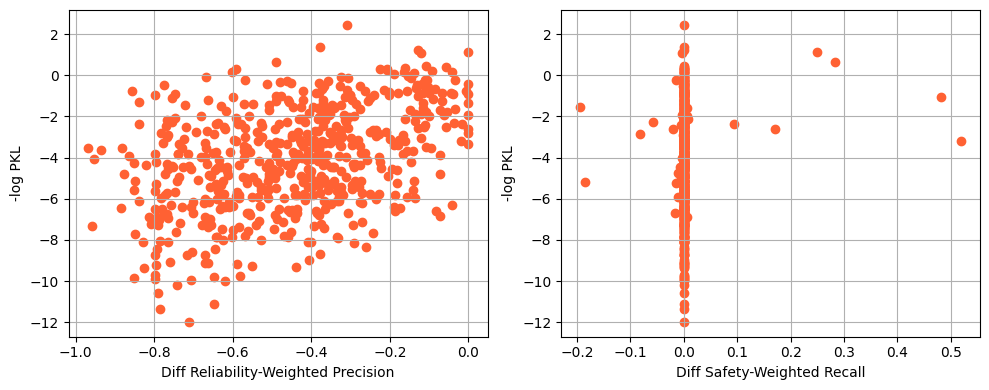

In [30]:
print("Visualizing {} samples".format(len(precs[0])))
import matplotlib.pyplot as plt

def plot(X, y, X_labels, y_label):
    #plt.xlim(np.min(x), np.max(x))
    #plt.ylim(np.min(y), np.max(y))
    fig, ax = plt.subplots(1, len(X),  figsize=(10, 4))
    for idx, x in enumerate(X): 
        #if X_labels[idx]!="-log PKL":
            #ax[idx].autoscale(False, axis="x")
            #ax[idx].set_xticks(np.arange(0, 1.1, 0.1))
            
        ax[idx].set_ylabel(y_label)
        ax[idx].set_xlabel(X_labels[idx])
        ax[idx].grid()
        ax[idx].scatter(x, y, c='#ff6133')
    fig.tight_layout()
    plt.show()
#plot("mAP_crit", "-log PKL", maps, pkls, 1)     
#plt.xticks(np.linspace(0, 1, 10))
plot((d_precs,d_recs), d_pkls, ("Diff Reliability-Weighted Precision","Diff Safety-Weighted Recall"), "-log PKL") 